In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl, awkward as ak, sys,ROOT
import mplhep as hep, glob, uproot as ur
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

plt.rcParams["figure.figsize"] = (8, 8)

Welcome to JupyROOT 6.27/01


In [135]:
files=glob.glob("out.root")
arrays_sim=ur.concatenate({f:"events" for f in files})

In [136]:
arrays_sim.fields

['CondorHits.cellID',
 'CondorHits.energy',
 'CondorHits.position.x',
 'CondorHits.position.y',
 'CondorHits.position.z',
 'CondorHits.contributions_begin',
 'CondorHits.contributions_end',
 '_CondorHits_contributions.index',
 '_CondorHits_contributions.collectionID',
 'CondorHitsContributions.PDG',
 'CondorHitsContributions.energy',
 'CondorHitsContributions.time',
 'CondorHitsContributions.stepPosition.x',
 'CondorHitsContributions.stepPosition.y',
 'CondorHitsContributions.stepPosition.z',
 '_CondorHitsContributions_particle.index',
 '_CondorHitsContributions_particle.collectionID',
 'EventHeader.eventNumber',
 'EventHeader.runNumber',
 'EventHeader.timeStamp',
 'EventHeader.weight',
 'MCParticles.PDG',
 'MCParticles.generatorStatus',
 'MCParticles.simulatorStatus',
 'MCParticles.charge',
 'MCParticles.time',
 'MCParticles.mass',
 'MCParticles.vertex.x',
 'MCParticles.vertex.y',
 'MCParticles.vertex.z',
 'MCParticles.endpoint.x',
 'MCParticles.endpoint.y',
 'MCParticles.endpoint.z',

Text(0.5, 1.0, 'MIP=3.6 MeV')

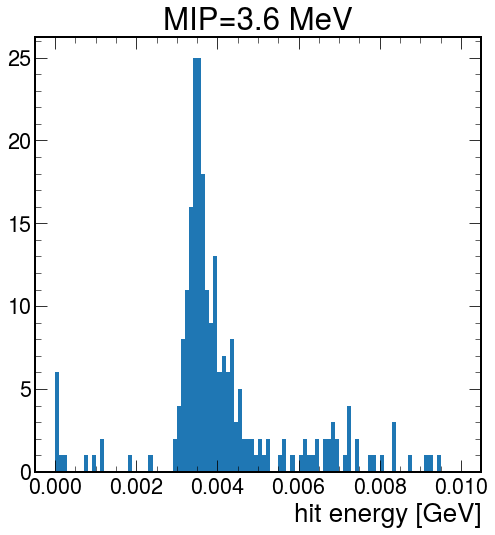

In [158]:
#!pip install pylandau
y,x,_=plt.hist(ak.flatten(arrays_sim["CondorHits.energy"]), bins=100, range=(0, 0.01))
maxy=max(y)
for i in range(len(y)):
    if y[i]==maxy:
       MIP=(x[i]+x[i+1])/2
# import pylandau
# from scipy.optimize import curve_fit

# f=lambda x,a,b,c: a*pylandau.landau((x-c)/b)
# popt, pcov=curve_fit(f, (x[:-1]+x[1:])/2, y, p0=(1000., 0.001, .0036))
# print(popt)
# aa=float(x[0]), float(popt[0]), float(popt[1]), float(popt[2])
# print(aa)
# print(f(*aa))
# y=[f(float(xx), popt[0], popt[1], popt[2]) for xx in list(x)]
# plt.plot(x, y, linestyle='-', label="Landau fit")

# MIP = popt[2]

plt.xlabel("hit energy [GeV]")
plt.title(f"MIP={MIP*1000:.1f} MeV")

In [138]:
def draw_outline():
    
    dX=8.7; dx=2; dY=8.1; dy=.604
    for i in range(0, 14):
        for j in range(0, 14):
            if i in (0,13) and j in (3,4, 6,7,9,10) \
                or j in (0,13) and i in (3,4, 6,7,9,10)\
                or i in (1,12) or j in (1, 12):
                continue
            r=mpl.patches.Rectangle(((i-7)*dX, (j-7)*dY), dX,dY, facecolor='w', edgecolor='0.6', zorder=-1)
            plt.gca().add_patch(r)

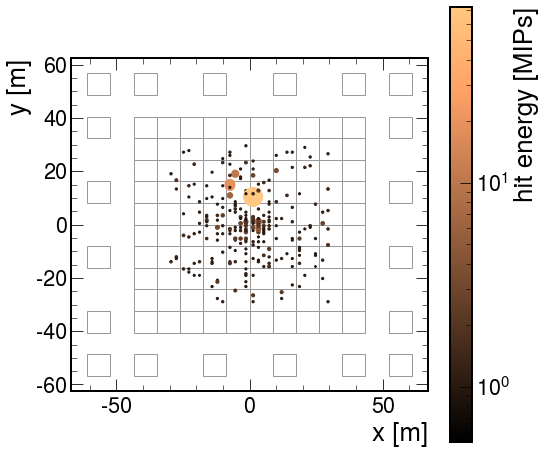

In [139]:
cm = plt.cm.get_cmap('copper')

E=arrays_sim["CondorHits.energy"]
x=arrays_sim["CondorHits.position.x"]/1000
y=arrays_sim["CondorHits.position.y"]/1000




sc=plt.scatter(x[E>MIP/2], y[E>MIP/2],
           c=E[E>MIP/2]/MIP,
               s=5*E[E>MIP/2]/MIP,cmap=cm, norm=mpl.colors.LogNorm())
cb=plt.colorbar(sc)
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.gca().set_aspect(1)
cb.set_label("hit energy [MIPs]")
draw_outline()

plt.show()

In [82]:
arrays_sim["CondorHits.position.x"]

<Array [[7.35e+03, 1.60e+04, ..., 1.88e+04, 2.08e+04]] type='1 * var * float32'>

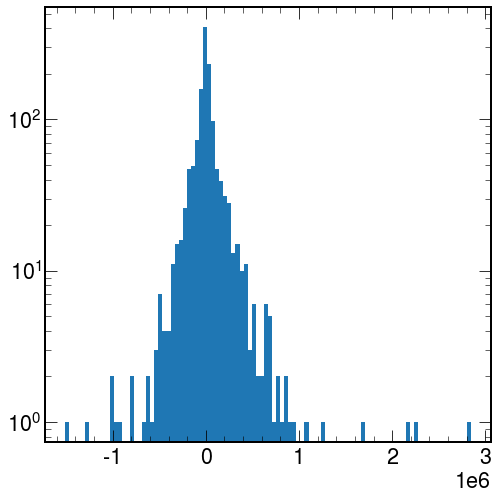

In [75]:
#plt.scatter(ak.flatten(arrays_sim["MCParticles.vertex.x"]), ak.flatten(arrays_sim["MCParticles.vertex.z"]))
plt.hist(ak.flatten(arrays_sim["MCParticles.vertex.x"][arrays_sim["MCParticles.generatorStatus"]==1]), bins=100)
plt.yscale('log')

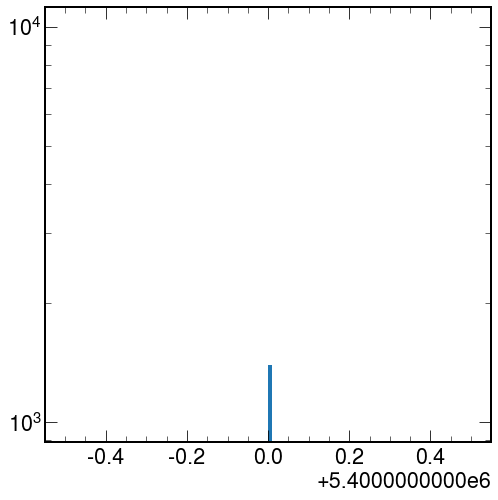

In [76]:
plt.hist(ak.flatten(arrays_sim["MCParticles.vertex.z"][arrays_sim["MCParticles.generatorStatus"]==1]), bins=100)
plt.yscale('log')

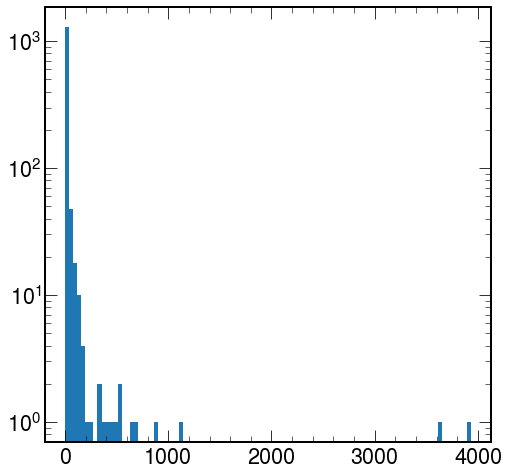

In [77]:
plt.hist(ak.flatten(arrays_sim["MCParticles.momentum.z"][arrays_sim["MCParticles.generatorStatus"]==1]), bins=100)
plt.yscale('log')

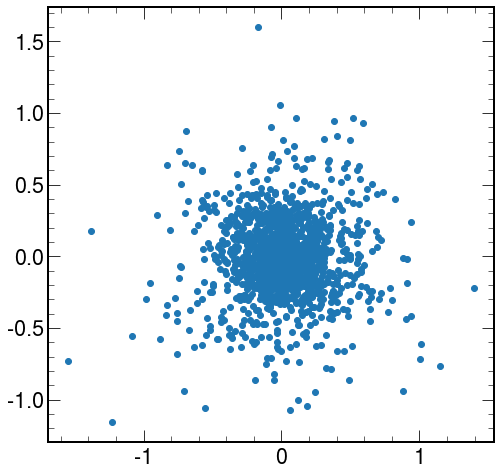

In [78]:
plt.scatter(ak.flatten(arrays_sim["MCParticles.momentum.x"][arrays_sim["MCParticles.generatorStatus"]==1]), ak.flatten(arrays_sim["MCParticles.momentum.y"][arrays_sim["MCParticles.generatorStatus"]==1]))

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 843.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
         180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
         270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
         360.,  370.,  380.,  390.

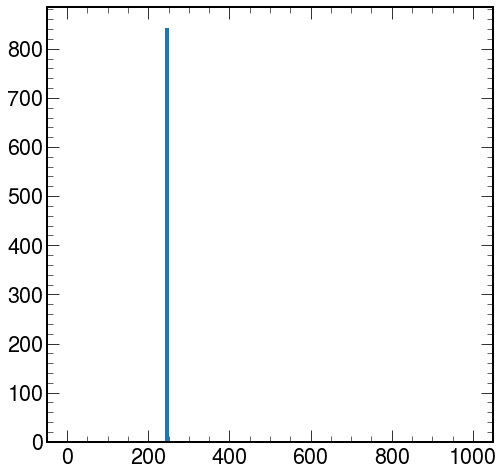

In [69]:
plt.hist(ak.flatten(arrays_sim["MCParticles.vertex.z"][arrays_sim["MCParticles.generatorStatus"]==1])/1000, bins=100,
        range=(0, 1000))

(array([1396.,    0.,    0., 1396.,    0.,    0.,    0.,    0.,    0.,
           2.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

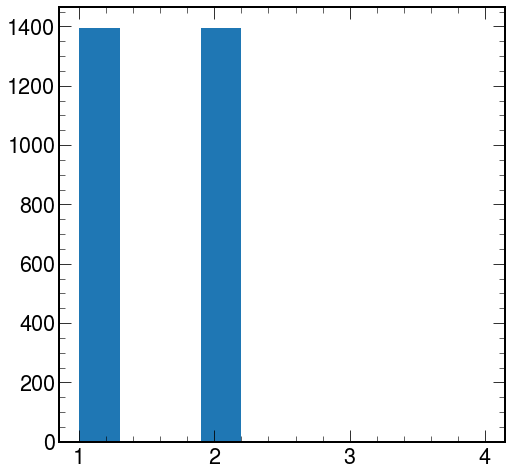

In [67]:
plt.hist(ak.flatten(arrays_sim["MCParticles.generatorStatus"]))

In [ ]:
set(arrays_sim["MCParticles.PDGcode"]